In [2]:
import pandas as pd
import matplotlib.pyplot as plt

resultsDF = pd.read_csv('results.csv')

resultsDF.shape

(25660, 18)

We see that we have a very comprehensive dataset. We have 18 columns, and 25660 rows/entries.

In [3]:
resultsDF.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

Quantitative Discrete:
resultId, raceId, driverId, constructorId, number, grid, points, laps, milliseconds, fastestLap

Quantitative Continuous:
time, fastestLapTime, fastestLapSpeed

Categorical Nominal:
none

Categorical Ordinal:
position, positionText, positionOrder, rank

Some interesting pieces of data are the position and positionText columns. Position indicates the final position of a driver at that specific race. However, we know that some drivers don't necessarily finish every race, due to a number of issues. To circumnavigate this, we could use the positionOrder column, which indicates the final rank of a driver at a specific race. This allows us to collect data on final finishing positions without having to take DNF's into account.

Although we're able to bypass DNF's for the final finishing positions, the same can't be said for other data collected from that driver that race. For example, what happens when a driver can't complete a lap before they retire? We won't have that driver's fastestLapTime, fastestLapSpeed, and rank values. 

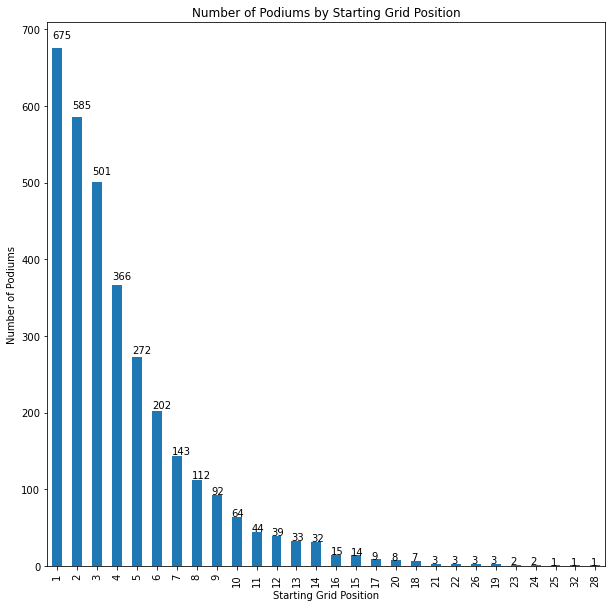

In [25]:
podiumDF = resultsDF[['positionOrder', 'grid']]
podiumDF = podiumDF.loc[podiumDF['positionOrder'] <= 3]

podiumGraph = podiumDF['grid'].value_counts().plot.bar(figsize = (10, 10), title = 'Number of Podiums by Starting Grid Position')
podiumGraph.set_xlabel('Starting Grid Position')
podiumGraph.set_ylabel('Number of Podiums')

for label in podiumGraph.patches:
    podiumGraph.annotate(str(label.get_height()), (label.get_x(), label.get_height() * 1.02))

As we can see from the following visualization, out of 3,232 podium results, 1,761, or 54.49% were achieved from drivers who qualified in the top 3 positions. This indicates that qualifying top 3 is a large advantage in the final race.

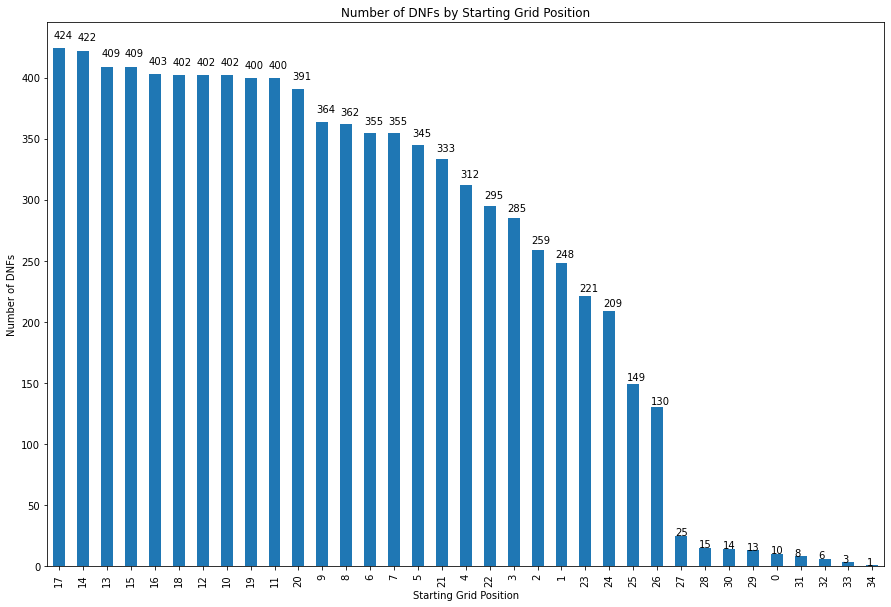

In [14]:
dnfDF = resultsDF[['grid', 'positionText']]
dnfDF = dnfDF.loc[dnfDF['positionText'] == 'R']

dnfGraph = dnfDF['grid'].value_counts().plot.bar(figsize = (15, 10), title = 'Number of DNFs by Starting Grid Position',)
dnfGraph.set_xlabel('Starting Grid Position')
dnfGraph.set_ylabel('Number of DNFs')

for label in dnfGraph.patches:
    dnfGraph.annotate(str(label.get_height()), (label.get_x(), label.get_height() * 1.02))

This visualization shows an interesting trend. The top 11 grid positions in terms of number of DNFs are all in the bottom half of the possible starting grid positions. Additionally, these 11 grid positions account for 4464 total DNFs out of the 8781 overall DNFs. In other words, around 51% of DNFs came from drivers who started in these grid positions. This raises the question of why so many DNFs come from those starting grid positions. Are drivers further in the back of the pack more likely to get into crashes? Do these drivers push their cars harder to make up for their poor qualifying performances? 